# Фильтрация изображений

## Загружаем и выводим тестовое изображение

In [7]:
import cv2
import numpy as np


In [8]:
#jupyter nbextension enable --py widgetsnbextension

In [9]:
img = cv2.imread('./lena.png')

Text(0.5, 1.0, 'Размер изображения: 512x512x3')

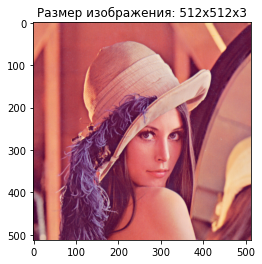

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(img[...,::-1])
plt.title('Размер изображения: %dx%dx%d' % img.shape)

## Функции создания ядер

In [11]:
def gauss_kernel(ksize = 5, sigma = 2.5):
    """ Возвращает гауссовское ядро размера ksize и дисперсией sigma """
    # ksize - размер ядра
    # sigma - дисперсия (ширина фильтра)
    ax = np.arange(-ksize // 2 + 1., ksize // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    e = np.float32((xx**2 + yy**2) / (2. * sigma**2))
    kernel = 1. / (sigma * np.sqrt(2. * np.pi)) * np.exp(-e)
    return kernel / np.sum(kernel)

def laplace_kernel(ksize = 5, sigma = 2.5):
    """ Возвращает ядро Лапласа размера ksize и дисперсией sigma """
    # ksize - размер ядра
    # sigma - дисперсия (ширина фильтра)
    ax = np.arange(-ksize // 2 + 1., ksize // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    e = np.float32((xx**2 + yy**2) / (2. * sigma**2))
    kernel = 1. / (np.pi * sigma**4) * (1. - e) * np.exp(-e)
    return kernel / np.sum(kernel)

kernels = {'gauss': gauss_kernel, 
           'laplace': laplace_kernel}

## Визуализация ядер

In [12]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [13]:
jupyter nbextension enable --py widgetsnbextension

SyntaxError: invalid syntax (<ipython-input-13-98201c4d83e5>, line 1)

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def show_kernel(kernel_type, ksize, sigma):
    kernel = kernels[kernel_type](ksize, sigma)
    r = np.arange(-ksize // 2 + 1., ksize // 2 + 1.)
    xx, yy = np.meshgrid(r, r)
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xx, yy, kernel, 
                    cmap=plt.cm.coolwarm,
                    linewidth=0, antialiased=True)
    plt.title('%s ksize=%s sigma=%.3f' % (kernel_type, ksize, sigma))
    return plt.show()

In [15]:
from ipywidgets import interact
interact(show_kernel, 
         kernel_type = kernels.keys(),
         ksize = (1, 20, 1),
         sigma = (1e-3, 10, 0.1));

interactive(children=(Dropdown(description='kernel_type', options=('gauss', 'laplace'), value='gauss'), IntSli…

## Фильтрация изображения

In [16]:
def filter_img(kernel_type, ksize = 5, sigma = 2.5):
    kernel = kernels[kernel_type](ksize, sigma)
    result = cv2.filter2D(img, cv2.CV_32F, kernel)
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    img_abs = np.abs(result)
    img_norm = img_abs / np.max(img_abs, axis=(0, 1))
    ax.imshow(img_norm[...,::-1])
    plt.title('%s ksize=%s sigma=%.3f' % (kernel_type, ksize, sigma))
    return plt.show()

In [17]:
interact(filter_img, 
         kernel_type = kernels.keys(),
         ksize = (1, 20, 1),
         sigma = (1e-3, 10, 0.1));

interactive(children=(Dropdown(description='kernel_type', options=('gauss', 'laplace'), value='gauss'), IntSli…